### IDs:
Insert yours IDs to the cell below

ID #1: 300420379

ID #2: Ben approved to submit alone


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

## Question 1 - Data viz - practical

Load Boston dataset from sklearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})


from sklearn.datasets import load_boston
boston = load_boston()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['MEDV'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# get femiliar with the dataset 
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
# To know more about the features I'll use boston_dataset.DESCR
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

#### 1. Produce a histogram of the apartments’ price. 

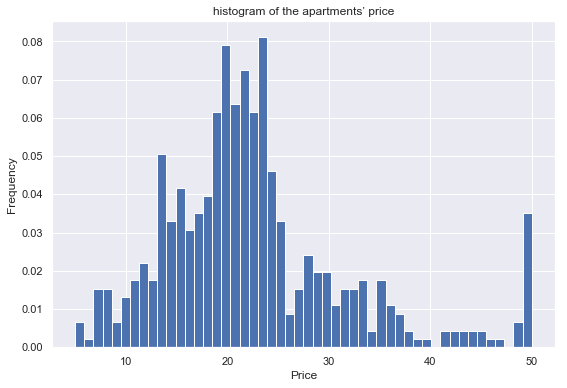

In [6]:
plt.figure(figsize=(9,6))
plt.title("histogram of the apartments’ price")
plt.xlabel("Price")
plt.ylabel("Frequency")

df.MEDV.plot.hist(density=True,bins=50)

# In case you want the occurrences run this instead:
# df.MEDV.plot.hist(bins=50)

#### 2. Produce a box plot of the apartments’ price. 

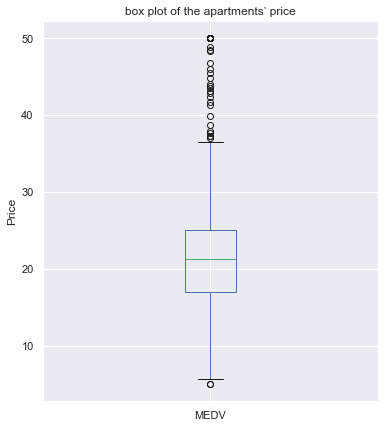

In [12]:
plt.figure(figsize=(6,7))
plt.title("box plot of the apartments’ price")
plt.ylabel("Price")

df.MEDV.plot.box()

#### 3. Produce a correlation matrix of all the features.

In [13]:
print('correlation matrix of all the features:')
df.corr()

correlation matrix of all the features:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


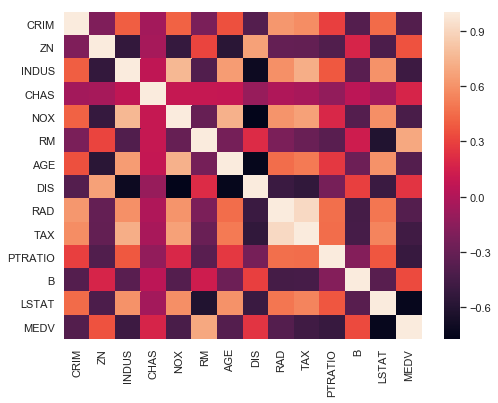

In [17]:
# In case you want also a heatmap of the correlations:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())


#### 4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JoinPlot)


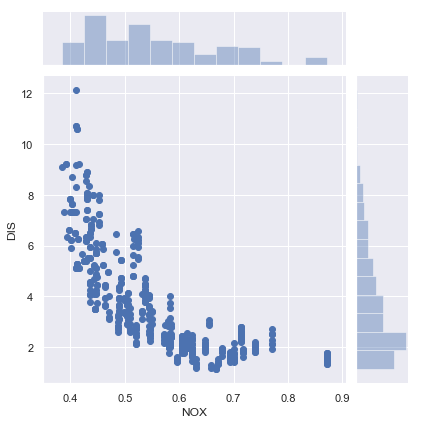

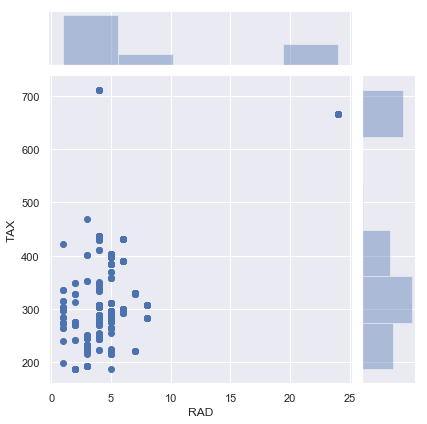

In [46]:
pairs = df.corr().abs().unstack().nlargest(n=len(df.columns)+4).nsmallest(4).index.values
pair1 = pairs[0]
pair2 = pairs[2]

# pair1
sns.jointplot(x=df[pair1[0]],y=df[pair1[1]],kind="scatter")

# pair2
sns.jointplot(x=df[pair2[0]],y=df[pair2[1]],kind="scatter")

# personally I would use kind="reg", cuz it more "complete scatter". but you specifically asked for scatter.

#### 5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)

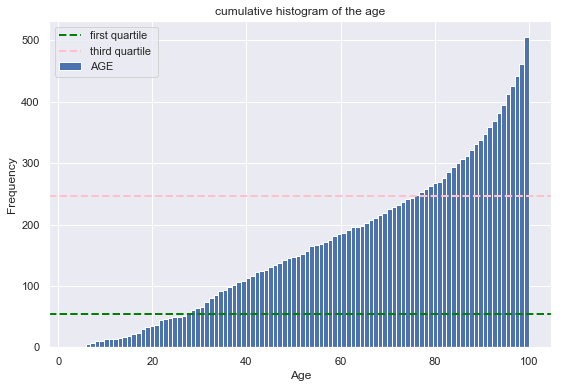

In [153]:
import scipy.stats as ss

plt.figure(figsize=(9,6))
plt.title("cumulative histogram of the age")
plt.xlabel("Age")
plt.ylabel("Cumulative Count")

bins = int(round(df.AGE.max()))
cc = ss.cumfreq(df.AGE,numbins=bins).cumcount
q25 = np.percentile(cc,25)
q75 = np.percentile(cc,75)

age_plot = df.AGE.plot.hist(cumulative = True,bins=100 )
plt.axhline(q25, color='green', linestyle='dashed', linewidth=2,label='first quartile')
plt.axhline(q75, color='pink', linestyle='dashed', linewidth=2,label='third quartile ')
plt.legend()

#### 6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

Here are two "intresting" trends:
- By looking at the histogram of MEDV, I can see that the values of MEDV are distributed normally with few outliers.
- By looking at the correlation matrix, I can see that RM has a strong positive correlation(about 0.7) with MEDV, whereas LSTAT has a high negative correlation(about -0.74) with MEDV.

<br>

Here are two trends that are actually intresting:
- By looking at the correlation between NOX and DIS, I can asume that the closer the proximity to the employment centres, the higher the nitric oxide concentration.
- By looking at the strong positive correlation between TAX and RAD, which implies that as accessibility of radial highways increases, the full value property-tax rate also increases.

## Question 2 - Gaussian mixtures

In this question N(μ, σ2) stands for a normal distribution with mean μ and variance σ2. <br>
Fred, Mel and Sid are repair technicians who work for Randobezeq – a phone company. <br>
* Fast Fred takes time which is distributed as N(40, 16) to repair a telephone line failure at a customer’s home.
* Medium Mel takes time which is N(45, 36) for the same task.
* Slow Sid takes time which is N(50, 64) for the same task.

#### 2.A

Fred is due to arrive to repair your phone at 11AM tomorrow. How confident can you be that you will be done by 11:45? 

In [19]:
from scipy.stats import norm

print('you can be {0}% confident that Fred will be done by 11:45. '.format(round(norm(loc=40,scale=4).cdf(45),4)*100))

you can be 89.44% confident that Fred will be done by 11:45. 


When a customer in North Randomistan orders a repair, there is a 40% chance Fred will do the work and 30% each that Mel or Sid will do the work. 

#### 2.B

What is the distribution of the duration of repair in North Randomistan?

It is a Gaussian mixture distribution.

##### Note:
It is not clear if I should give an equation or an actual distribution.I assume you meant the latter.


###### Solution as shown in class:

GMM mean: 44.434
GMM var: 52.481


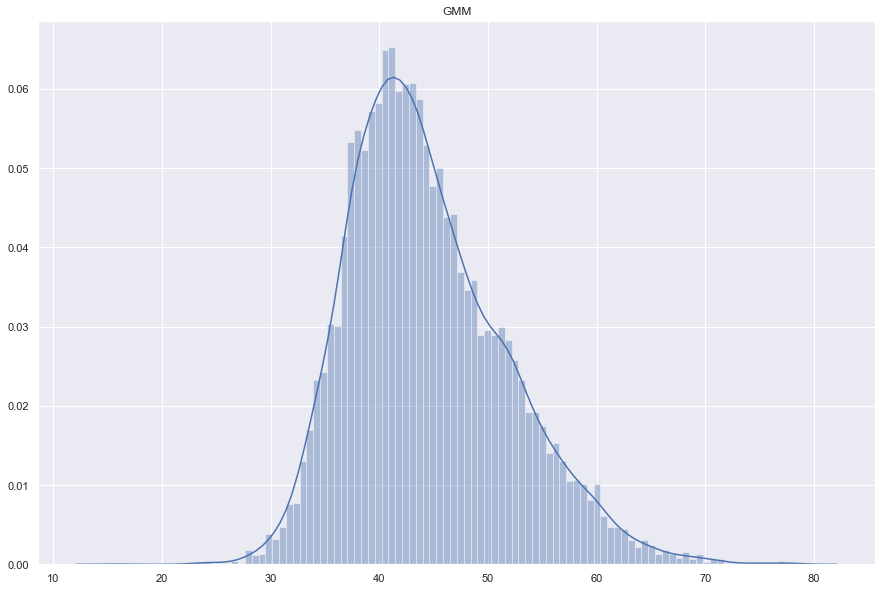

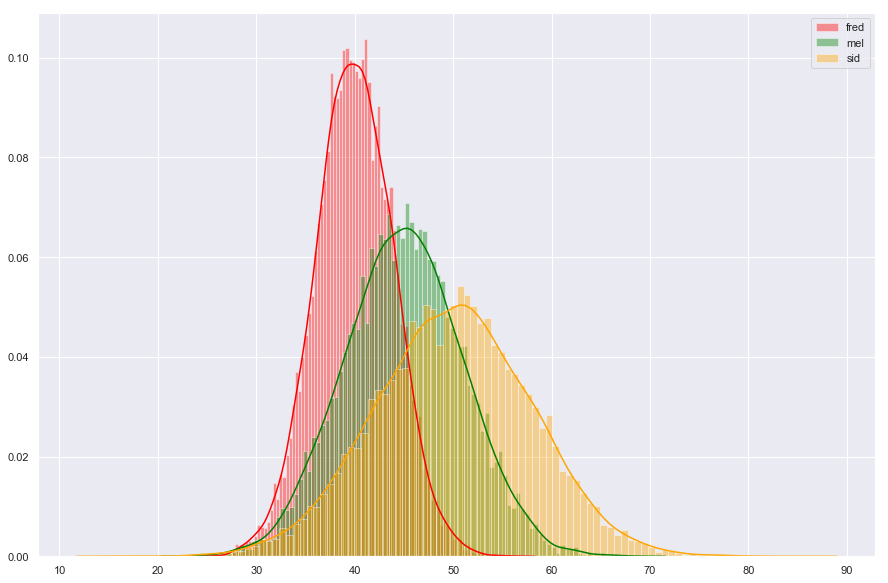

In [28]:
from scipy import stats 
# create Q's data
info = {}
info['size'] = 10000
info['fred'] = {}
info['mel'] = {}
info['sid'] = {}

info['fred']['mean'] = 40
info['mel']['mean'] = 45
info['sid']['mean'] = 50

info['fred']['std'] = 4
info['mel']['std'] = 6
info['sid']['std'] = 8

info['fred']['weight']  = 0.4
info['mel']['weight']  = 0.3
info['sid']['weight']  = 0.3

info['fred']['values']  = norm(loc=info['fred']['mean'],scale=info['fred']['std']).rvs(info['size'])
info['mel']['values']  = norm(loc=info['mel']['mean'],scale=info['mel']['std']).rvs(info['size'])
info['sid']['values']  = norm(loc=info['sid']['mean'],scale=info['sid']['std']).rvs(info['size'])

# create GMM's
info['GMM'] = np.empty(info['size'])

for i in range(info['size']):
    p = stats.uniform.rvs(size=1)
    
    if p<info['fred']['weight']: #fred
        r = np.random.choice(info['fred']['values'])
    elif p< info['fred']['weight'] + info['mel']['weight']: #mel
        r = np.random.choice(info['mel']['values'])
    elif p < info['fred']['weight'] + info['mel']['weight'] + info['sid']['weight'] : #sid
        r = np.random.choice(info['sid']['values'])
    else: # in case of error or prb not sum to 1
        r = -1
        
    info['GMM'][i] = r 

print('GMM mean: ' + str(round(np.mean(info['GMM']),3)))    
print('GMM var: ' + str(round(np.var(info['GMM']),3)))    

    
plt.figure(figsize=(15,10))
sns.distplot(info['GMM'],bins=100)
plt.title('GMM')
plt.show()

plt.figure(figsize=(15,10))
sns.distplot(info['fred']['values'],bins=100,label='fred',color='red')
sns.distplot(info['mel']['values'],bins=100,label='mel',color='green')
sns.distplot(info['sid']['values'],bins=100,label='sid',color='orange')
plt.legend()
plt.show()

###### Another 'pythonic' solution:

    import numpy as np  
    import numpy.random  
    import scipy.stats as ss  
    import matplotlib.pyplot as plt  


    n = info['size']  
    norm_params = np.array([[info['fred']['mean'], info['fred']['std']],[info['mel']['mean'], info['mel']['std']],[info['sid']['mean'], info['sid']['std']]])  
    weights = np.array([info['fred']['weight'],info['mel']['weight'],info['sid']['weight']])  
    n_components = len(weights)  

    ##### A stream from which to choose the component  
    mixture_idx = numpy.random.choice(n_components, size=n, replace=True, p=weights)  

    ##### the mixture sample  
    y = numpy.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),dtype=np.float64)  

    ##### generate the x and y plotting positions  
    xs = np.linspace(y.min(), y.max(), 200)  
    ys = np.zeros_like(xs)  

    for (l, s), w in zip(norm_params, weights):  
        ys += ss.norm.pdf(xs, loc=l, scale=s) * w  

    plt.figure(figsize=(15,10))  
    plt.plot(xs, ys)  
    plt.hist(y, normed=True, bins=100)  
    plt.show()  

#### 2.C
Let Φ denote the CDF of a standard normal random variable. Use Φ to express the CDF of the duration of a repair in North Randomistan.

$$ \Phi_{repair}=\Sigma w_{i}\Phi_{\mu_{i},\sigma_{i}}(x) $$

$$ \Phi_{fred}=\Phi\bigg(\frac{X-\mu_{fred}}{\sigma_{fred}}\bigg)=\Phi\bigg(\frac{x-40}{16}\bigg)  \space,\space\space  W_{fred} = 0.4$$

$$ \Phi_{mel}=\Phi\bigg(\frac{X-\mu_{mel}}{\sigma_{mel}}\bigg)=\Phi\bigg(\frac{x-45}{36}\bigg) \space,\space\space  W_{mel} = 0.4$$

$$ \Phi_{sid}=\Phi\bigg(\frac{X-\mu_{sid}}{\sigma_{sid}}\bigg)=\Phi\bigg(\frac{x-50}{64}\bigg) \space,\space\space  W_{sid} = 0.4$$

$$ \Phi_{repair}=0.4 \Phi\bigg(\frac{x-40}{16}\bigg) + 0.3 \Phi\bigg(\frac{x-45}{36}\bigg) + 0.3 \Phi\bigg(\frac{x-50}{64}\bigg) $$

#### 2.D

If the repair starts at 11AM, what is the earliest time for which the customer can assume, at a 95% certainty, that the repair will be already done?

In [87]:
# minutes datapoints
n = np.arange(100)

# create wieghted CDFs
info['fred']['cdf_w'] = info['fred']['weight'] * norm.cdf(n,loc=info['fred']['mean'],scale=info['fred']['std'])
info['mel']['cdf_w'] = info['mel']['weight'] * norm.cdf(n,loc=info['mel']['mean'],scale=info['mel']['std'])
info['sid']['cdf_w'] = info['sid']['weight'] * norm.cdf(n,loc=info['sid']['mean'],scale=info['sid']['std'])

# get confidence for every minute datapoint
confidence = info['fred']['cdf_w'] + info['mel']['cdf_w'] + info['sid']['cdf_w']

# get the minute which the CDF is bigger then %95
minute = np.argmax(confidence>=0.95)

# get the time which that index represent
print('With a certainty of %95, you can be confident that the earliest it will be done is within ' + str(minute) + ' minutes (after 11AM)')

With a certainty of %95, you can be confident that the earliest it will be done is within 59 minutes (after 11AM)


### Question 3 - Gaussian mixtures – parameter estimation and generation

Consider the data provided in GMD.xlsx
Assume that the data comes from a Gaussian mixture distribution (GMD). Furthermore, assume that μ1=0 and that σ1=σ2=1.
Read the data and answer the following questions.

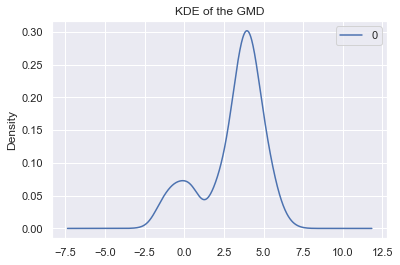

In [93]:
import pandas as pd
import numpy as np

df = pd.read_excel('GMD.xlsx',header=None)
arr = df.values

df.plot(kind='kde')
plt.title('KDE of the GMD')
plt.show()

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

### NOTE: 
I did several ways, due to  Ben's answer in Piazza, that happen after I already did everything.   
And I did not want to delete my "hard work".   
so just in case here are 4 ways.  

##### First way - Using GaussianMixture by scikit-learn

In [102]:
def GMM_sklearn(arr):
    from sklearn.mixture import GaussianMixture
    
    # givven
    random_e1 = 1
    random_v1 = 1
    random_v2 = 1
    
    # get a 'close' random mean
    random_e2 = np.mean(arr)
    
    # shuffled the data
    arr_shuffled = np.random.shuffle(arr)
    
    # model
    gm = GaussianMixture(n_components=2,verbose=False,means_init=[[1],[random_e2]],precisions_init=[[[1]],[[1]]])
    gm.fit(arr)

    # get params
    means = gm.means_
    covs = gm.covariances_
    weights = gm.weights_
    
    print('1st Method by scikit learn:')
    print('\tThe estimated means are:      {0} , {1} '.format(round(means[0][0],3),round(means[1][0],3)))
    print('\tThe estimated covariances are: {0} , {1} '.format(round(covs[0][0][0],3),round(covs[1][0][0],3))   )
    print('\tThe estimated weights are:     {0} , {1} '.format(round(weights[0],3),round(weights[1],3))   )
    return gm 

gm = GMM_sklearn(arr)

1st Method by scikit learn:
	The estimated means are:      -0.136 , 3.966 
	The estimated covariances are: 0.958 , 0.952 
	The estimated weights are:     0.207 , 0.793 


##### Second way - Calculation

In [104]:
# givven
mean1 = 0
var1 = 1
var2 = 1

# general dataset
general_mean = np.mean(df)[0]
general_var = pd.DataFrame.var(df)[0]

# second mean calculation
mean2 = (general_var + general_mean**2 - 1) / general_mean

# weights calculations
weight2 = general_mean/mean2
weight1 = 1-weight2

print('2st Method by calculation:')
print('\tThe estimated means are:       {0} , {1} '.format(round(mean1,3),round(mean2,3)))
print('\tThe estimated covariances are: {0} , {1} '.format(round(var1**2,3),round(var2**2,3)))
print('\tThe estimated weights are:     {0} , {1} '.format(round(weight1,3),round(weight2,3)))

2st Method by calculation:
	The estimated means are:       0 , 3.989 
	The estimated covariances are: 1 , 1 
	The estimated weights are:     0.219 , 0.781 


##### Third way - Searching

In [105]:
# using "grid search" in order to find the fourth parameter

from itertools import product

sorted_df = df.copy().sort_values(by=0).values
size = len(sorted_df)

# initial values for search
sigma_size = (1,2)
mean_range = (-10,10)
mean_size = 100
weight_size = 100

# 
sigma = np.ones(sigma_size)
mean = np.vstack((np.zeros(mean_size), np.linspace(mean_range[0],mean_range[1],mean_size))).T
weight = np.vstack((np.linspace(0,1,weight_size), 1-np.linspace(0,1,weight_size))).T
product_values = list(product(weight,mean,sigma))

# create all combinations for search
combinations = pd.DataFrame(product_values, columns=["Weight", "Mean", "Sigma"])
err_arr = np.array([])

# search
for _, row in combinations.iterrows():
    dist1 = np.random.normal(loc = row.Mean[0], scale = row.Sigma[0], size = int(round(row.Weight[0] * size)))
    dist2 = np.random.normal(loc = row.Mean[1], scale = row.Sigma[1], size = int(round(row.Weight[1] * size)))
    mixture = np.sort(np.append(dist1, dist2))
    err_arr = np.append(err_arr, np.abs(sorted_df.flatten() - mixture).sum())

# get the optimal error rate
optimum = combinations.iloc[np.argmin(err_arr)]

print('2st Method by search:')
print('\tThe estimated means are:       {0} , {1} '.format(round(optimum.loc["Mean"][0],3),round(optimum.loc["Mean"][1],3)))
print('\tThe estimated covariances are: {0} , {1} '.format(round(optimum.loc["Sigma"][0]**2,3),round(optimum.loc["Sigma"][1]**2,3))   )
print('\tThe estimated weights are:     {0} , {1} '.format(round(optimum.loc["Weight"][0],3),round(optimum.loc["Weight"][1],3))   )

2st Method by search:
	The estimated means are:       0.0 , 3.939 
	The estimated covariances are: 1.0 , 1.0 
	The estimated weights are:     0.202 , 0.798 


##### Fourth way  - Using EM algorithm
    import scipy.stats as ss

    #get a 'close' random mean
    random_e2 = np.mean(arr)

    #shuffled the data
    arr_shuffled = np.random.shuffle(arr)

    #Expectation–Maximization algorithm

    class EM:

        def __init__(self,values,mean1,std1,std2):
            self.values = values
            self.mean1_given = mean1
            self.std1_given = std1
            self.std2_given = std2
            self.iterations = 4

        def initial_step(self):
            self.mean1 = 1 #np.random.randint(low=np.min(self.values),high=np.max(self.values))
            self.mean2 = 4 #np.random.randint(low=np.min(self.values),high=np.max(self.values))
            self.std1 = self.std1_given
            self.std2 = self.std2_given
            self.w1 = 0.5
            self.w2 = 0.5


        def e_step(self):
            print('self.mean1' + ' ' + str(self.mean1))
            print('self.std1' + ' ' + str(self.std1))
            print('self.w1' + ' ' + str(self.w1))
            self.proba1 = self.w1 * ss.norm.pdf(self.values,loc=self.mean1,scale=self.std1)
            self.proba2 = self.w2 * ss.norm.pdf(self.values,loc=self.mean2,scale=self.std2)
            self.proba_total = self.proba1+self.proba2
            print('self.proba1[0] = ' + str(self.proba1[0]))


        def m_step(self):
            size = len(self.values)
            r1 = np.divide(self.proba1,self.proba_total)
            r2 = np.divide(self.proba2,self.proba_total)
            self.w1_new = r1.sum() / size
            self.w2_new = r2.sum() / size
            self.mean1_new = r1.sum() / self.w1_new
            self.mean2_new = r2.sum() / self.w2_new


        def iterate_until_convergence(self):
            self.initial_step()

            # stop by iteration
            for i in range(self.iterations):
                print('i = ' + str(i))

                # main steps
                self.e_step()
                self.m_step()

                # stop if all new w1,w2,mean1,mean2 are close to current ones
                f1 = np.isclose(a=self.mean1,b=self.mean1_new,atol=0.01)
                f2 = np.isclose(a=self.mean2,b=self.mean2_new,atol=0.01)
                f3 = np.isclose(a=self.w1,b=self.w1_new,atol=0.01)
                f4 = np.isclose(a=self.w2,b=self.w2_new,atol=0.01)

                if f1+f2+f3+f4 == 4:
                    return 1 # converge

                print(self.mean1)
                print(self.mean2)
                print(self.w1)
                print(self.w2)

                self.mean1 = self.mean1_new        
                self.mean2 = self.mean2_new
                self.w1 = self.w1_new
                self.w2 = self.w2_new
                print()

            return 0 # iteration

    em = EM(mean1=1,std1=1,std2=1,values=df.values)
    em.iterate_until_convergence()

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

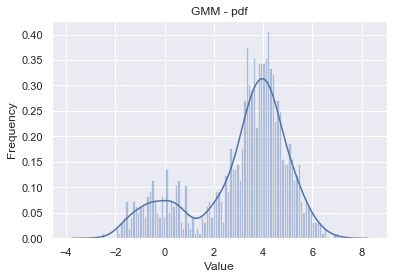

I Set the limits far enough to see the line getting close enough to Zero


In [106]:
x = np.linspace(np.min(arr), np.max(arr), 1000)

# plot
sns.distplot(arr,bins=100)

# title
plt.title('GMM - pdf')
plt.ylabel('Frequency')
plt.xlabel('Value')

# I set the limits far enough to see the line getting close enough to Zero
plt.xlim(xmin=np.min(arr)-2,xmax=np.max(arr)+2)

plt.show()

print('I Set the limits far enough to see the line getting close enough to Zero')

#### 3.C
Describe two ways for generating data for a GMD random variable with:
* centers at  μ1+3 and μ2+5 
* σ1=σ2=1
* w1=w2=0.5

##### First way 
- generated array with size n and fill it with data point from a Random sampling with a Gaussian disterbution (μ1+3,1)
- generated array with size n and fill it with data point from a Random sampling with a Gaussian disterbution (μ2+5,1)
- combine the two array into one dataset

##### Second way
- Flip a fare coin n times
    - If it Heads: append to the dataset Random sampling with a Gaussian disterbution (e1+3,std1=1)
    - If it Tails: append to the dataset Random sampling with a Gaussian disterbution (e2+5,std1=1)

#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


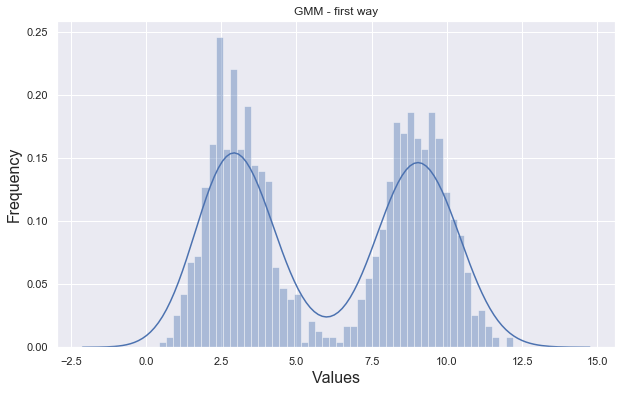

In [145]:
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# I desided
e1 = 0 
e2 = 4 

# givven
size = 500
loc1= e1+3
loc2= e2+5
scale1 = 1
scale2 = 1
w1 = 0.5
w2 = 0.2

first_gaussian = stats.norm.rvs(loc=loc1, scale=scale1, size=size)
second_gaussian = stats.norm.rvs(loc=loc2, scale=scale2, size=size)

gmm_data1= np.array([first_gaussian,second_gaussian]).reshape(1,size*2)

plt.figure(figsize=(10, 6))
sns.distplot(gmm_data1, bins=50)
plt.title('GMM - first way')
plt.xlabel("Values", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.show()

#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


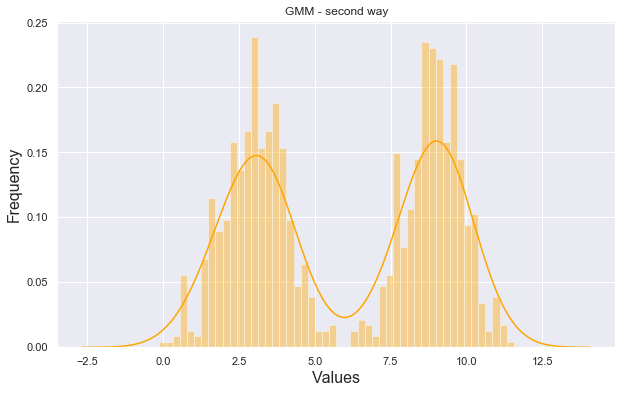

In [148]:
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# I desided
e1 = 0 
e2 = 4 

# givven
size = 1000
loc1= e1+3
loc2= e2+5
scale1 = 1
scale2 = 1
w1 = 0.5
w2 = 0.2

first_gaussian = stats.norm.rvs(loc=loc1, scale=scale1, size=size)
second_gaussian = stats.norm.rvs(loc=loc2, scale=scale2, size=size)

gmm_data2 = []
for i in range(size):
    p = stats.uniform.rvs(size=1)
    if p < w1:
        gmm_data2.append(np.random.choice(a=first_gaussian, size=1))
    else:
        gmm_data2.append(np.random.choice(a=second_gaussian, size=1))

plt.figure(figsize=(10, 6))
sns.distplot(gmm_data2, bins=50,color='orange')
plt.title('GMM - second way')
plt.xlabel("Values", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.show()

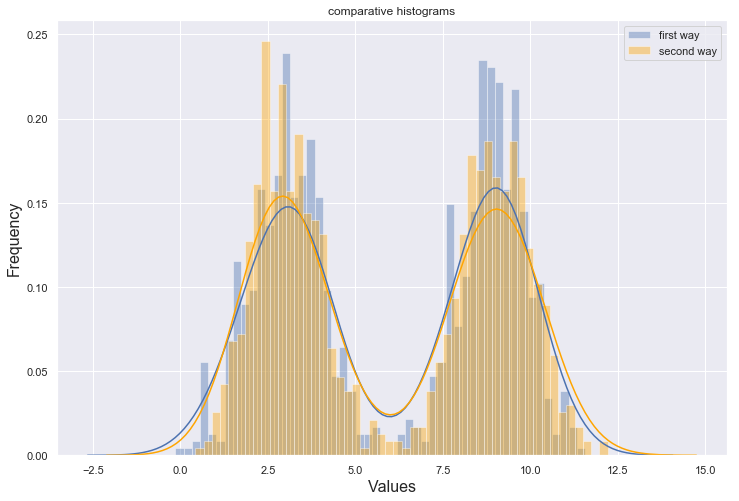

In [149]:
plt.figure(figsize=(12, 8))
sns.distplot(gmm_data2, bins=50,label='first way')
sns.distplot(gmm_data1, bins=50,label='second way',color='orange')
plt.title('comparative histograms')
plt.xlabel("Values", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.legend()
plt.show()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 50,000 RCU and a standard deviation of 20,000 RCU.

In [107]:
from scipy.stats import norm

mean = 50000
std = 20000

nd = norm(loc=mean,scale=std)

#### 4.A
What percent of people earn less than 40,000 RCU?

In [108]:
print('{0}%'.format(round(nd.cdf(40000)*100,2)))

30.85%


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [60]:
print('{0}%'.format(round((nd.cdf(65000)-nd.cdf(45000))*100,2)))

37.21%


#### 4.C
What percent of people earn more than 70,000 RCU?

In [62]:
print('{0}%'.format( round((1-nd.cdf(70000))*100 ,2) ))

15.87%


#### 4.D
The company has 1000 employees. Do you expect that there are any employees that earn more than 120,000 RCU?  

In [88]:
proba = round((1-nd.cdf(120000)),6)
print('the probability of that could heppen is {0} ({1}%).'.format(proba,round(proba*100,3)))
print('Because there is a 1K employees, I expect {0} employees earning more then 120K RCU.'.format(int(proba*1000)))
print('so NO!')

the probability of that could heppen is 0.000233 (0.023%).
Because there is a 1K employees, I expect 0 employees earning more then 120K RCU.
so NO!



### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [112]:
def coupon_mean(Tn):
    return round(np.sum( 1 / ((Tn - np.arange(Tn)) / Tn) ),3)

#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [113]:
def coupon_var(Tn):
    p = (Tn - np.arange(Tn)) / Tn
    return round(np.sum( (1-p)/pow(p,2) ),3)

#### 5.C
Write code to exactly compute $P(T_{20}>60)$

In [142]:
'''
n = n coupon
g = greater then g
'''
def proba_coupon_ng(n,g):
    from scipy.stats import geom
    
    p = (n - np.arange(n)) / n
    
    range_g = np.arange(g) + 1
    result = geom.pmf(range_g, p[0])
    
    for current in p[1:]:
        k = geom.pmf(range_g, current)
        result = np.convolve(result, k)
    
    return 1 - result[:int(g+1-n)].sum()

print(round(proba_coupon_ng(20,60),3))

0.639


$P(T_{20}>60) = 0.64$

#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

In [125]:
Tn = 20
coupon_mean(Tn),coupon_var(Tn)

(71.955, 566.511)

In [143]:
# parameters
coupon_mean20 = coupon_mean(20)
coupon_var20 = coupon_var(20)
std20 = np.sqrt(coupon_var20)

# limits
limit1 = 60
limit2 = 2*coupon_mean20-limit1

# Calculations
k = abs((limit1-coupon_mean20)/np.sqrt(std20))
upperLimit = coupon_var20/(60-coupon_mean20)**2 - (1- proba_coupon_ng(20,round(limit2)) )

print ("k = " + str(round(k,3)))
print("Chebyshev Upper Bound = " + str(round(upperLimit,2)))

k = 2.45
Chebyshev Upper Bound = 3.21


### Question 6 - More on convolutions

Let n be an integer, not prime. <br>
Find two distributions a and b on the nonnegative integers, both not concentrated at 0 (this is the trivial answer…), such that the convolution of a and b is the equiprobable (uniform) distribution on the set of numbers 0, 1, 2, . . . , n-1.

Note: If n is prime this is not possible, but the proof is not so easy.   

Self note: For some reason, I had a really difficult time solving this question. And I got some help and ideas from our study group.


###### Step 1
As n is a non-prime, there must be two integers, different then n or one, that there multiplication will equals n, as follows:
$$q,p \ne n,1 \space \Rightarrow \space qp=n$$

##### Step 2
I'll defibe $\delta[n]$ as the unit impulse function.  
And Also define a and b as follows:  
$$a=\frac{1}{p}\sum_{i=0}^{p-1} \delta[n-i \cdot q] \Rightarrow \text{q-spaced sequence of p impulses of height } \frac{1}{p} \text{ starting at n=0}$$    
$$b=\Theta_{0,q-1}[n] \Rightarrow \text{denote a uniform distribution between 0 and q-1}$$

##### Step 3
Perform a convelotion operation on a and b will result $\Rightarrow$ p copies of b, each with length q and spaced by q, while starting at 0.  
Due to no overlapping, all value will be the same!  
Each value is $\frac{1}{p \cdot q}=\frac{1}{n}$.  

##### Step 4:
The total number of values is $p \cdot q = n$ , thus, the resulting distribution is $a * b = \Theta_{0,n-1}$ .   
Done!